# Data Clustering

## Image segmentation by K-Means

The objective of this lab is to show how to use K-Means to segment images. 

You will find below the code for segmenting a greyscale image into K images, each with a specific grey level, by K-Means. We refer to each such image as a **mask**.

## To do

1. Apply K-Means to each mask (with an appropriate value of K) so as to identify different parts / objects of the original image. Test on various images.
2. Adapt the method to color images.


## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [ ]:
from sklearn.cluster import KMeans

## Load images

In [3]:
# load the raccoon image as a numpy array
try:
    face = -scipy.face(gray=True)
except AttributeError:
    from scipy import misc
    face = -misc.face(gray=True)

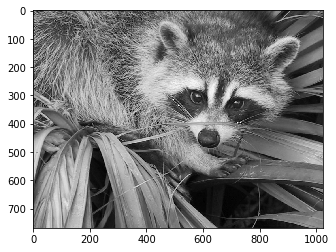

In [4]:
plt.imshow(face, cmap='binary')
plt.show()

In [5]:
img = face[:500,400:900]

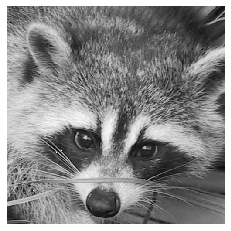

In [6]:
plt.imshow(img,cmap = 'binary')
plt.axis('off')
plt.show()

## Application to greyscale image

In [7]:
k = 4

In [ ]:
km = KMeans(n_clusters=k, n_init=5)

In [8]:
# 1D array
X = img.reshape((-1,1))

In [ ]:
X.shape

In [ ]:
X[:10]

In [ ]:
km.fit(X)

In [ ]:
km.cluster_centers_

In [ ]:
km.labels_

In [ ]:
X_ = km.cluster_centers_[km.labels_]
X_ = X_.astype('uint8')

In [ ]:
# selected levels of grey
np.unique(X_)

In [ ]:
# new image with k levels of grey
img_ = X_.reshape(img.shape)

In [ ]:
plt.imshow(img_,cmap = 'binary')
plt.axis('off')
plt.show()

In [ ]:
def get_masks(img, km):
    masks = []
    for j in range(km.n_clusters):
        X_ = (km.labels_ == j) * km.cluster_centers_[j]
        X_ = X_.astype('uint8')
        masks.append(X_.reshape(img.shape))
    return masks

In [ ]:
masks = get_masks(img, km)

In [ ]:
def show_masks(masks):
    for img in masks:
        plt.figure()
        plt.imshow(img, cmap = 'binary', vmin = 0, vmax = 255)
        plt.axis('off')
        plt.show()

In [ ]:
show_masks(masks)

## Application to color picture

In [ ]:
import os.path
from urllib.request import urlretrieve as download

In [ ]:
filename = 'flower.jpg'
if not os.path.isfile(filename):
    download('http://farm3.static.flickr.com/2024/2527645219_a4931e5a26.jpg', filename)

In [ ]:
img = plt.imread('./flower.jpg')
# 2D array
X = img.reshape(-1,3)

In [ ]:
plt.imshow(img)
plt.axis('off')
plt.show()